In [6]:
from games.tictactoe.tictactoe import TicTacToe
from base.agent import Agent
from agents.agent_random import RandomAgent
from agents.mcts import MonteCarloTreeSearch
from agents.minimax import MiniMax
import numpy as np
from collections import defaultdict

In [7]:
game = TicTacToe(render_mode='')

In [8]:
def play(agent1: Agent, agent2: Agent, num_games: int):
    rewards = {
        agent1.agent: [],
        agent2.agent: []
    }

    players = {
        agent1.agent: agent1,
        agent2.agent: agent2
    } 

    for i in range(num_games):
        game.reset()

        while not game.terminated():
            agent = game.agent_selection
            action = players[agent].action()
            game.step(action)
        for agent in game.agents:
            rewards[agent].append(game.reward(agent))
    
    for agent in game.agents:
        print(f"Agent {agent} ({players[agent].__class__.__name__}) average reward: {np.mean(rewards[agent])} over {num_games} games")
        print(f"Agent {agent} ({players[agent].__class__.__name__}) rewards: {rewards[agent]}")

    return rewards

### Random vs Minmax

In [16]:
_ = play(RandomAgent(game=game, agent=game.agents[0]), MiniMax(game=game, agent=game.agents[1], depth=4), num_games=10)

Agent X (RandomAgent) average reward: -0.6 over 10 games
Agent X (RandomAgent) rewards: [-1, 0, 0, 0, -1, -1, -1, -1, -1, 0]
Agent O (MiniMax) average reward: 0.6 over 10 games
Agent O (MiniMax) rewards: [1, 0, 0, 0, 1, 1, 1, 1, 1, 0]


In [17]:
depth_rewards = {agent: [] for agent in game.agents}
for depth in range(1, 9):
    print(f"Depth: {depth}")
    rewards = play(RandomAgent(game=game, agent=game.agents[0]), MiniMax(game=game, agent=game.agents[1], depth=depth), num_games=50)
    for agent in game.agents:
        depth_rewards[agent].append(np.mean(rewards[agent]))

Depth: 1
Agent X (RandomAgent) average reward: -0.46 over 50 games
Agent X (RandomAgent) rewards: [-1, -1, -1, -1, 0, -1, -1, 1, 0, -1, -1, 0, -1, 0, 1, -1, 1, -1, 0, 0, -1, -1, -1, -1, -1, 0, 0, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 0, -1, 0, -1, -1, -1, 1, -1, -1, 0, -1]
Agent O (MiniMax) average reward: 0.46 over 50 games
Agent O (MiniMax) rewards: [1, 1, 1, 1, 0, 1, 1, -1, 0, 1, 1, 0, 1, 0, -1, 1, -1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 0, 1, 0, 1, 1, 1, -1, 1, 1, 0, 1]
Depth: 2
Agent X (RandomAgent) average reward: -0.74 over 50 games
Agent X (RandomAgent) rewards: [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, 0, -1, -1, -1, -1, -1, 0, -1, 0, -1, -1, -1, 0, 0, -1, 1, -1, 0, -1, -1, 0, -1, -1, -1, 0, 0, -1]
Agent O (MiniMax) average reward: 0.74 over 50 games
Agent O (MiniMax) rewards: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,

In [18]:
depth_rewards

{'X': [-0.46, -0.74, -0.78, -0.8, -0.68, -0.88, -0.8, -0.86],
 'O': [0.46, 0.74, 0.78, 0.8, 0.68, 0.88, 0.8, 0.86]}

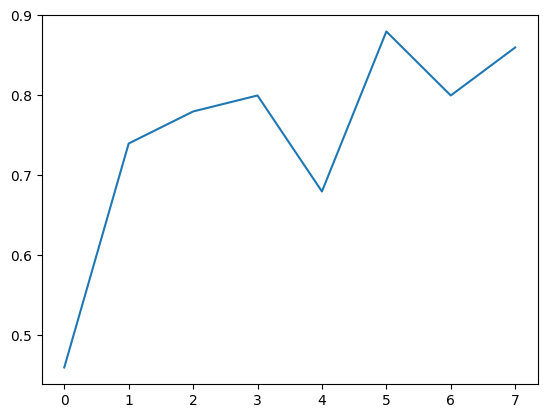

In [22]:
import matplotlib.pyplot as plt

plt.plot(depth_rewards['O'])

### Random vs MCTS

In [20]:
play(
    RandomAgent(game=game, agent=game.agents[0]),
    MonteCarloTreeSearch(game=game, agent=game.agents[1], simulations=100, rollouts=5, max_depth=4),
    num_games=10
)

Agent X (RandomAgent) average reward: -0.9 over 10 games
Agent X (RandomAgent) rewards: [-1, -1, -1, -1, -1, -1, -1, -1, 0, -1]
Agent O (MonteCarloTreeSearch) average reward: 0.9 over 10 games
Agent O (MonteCarloTreeSearch) rewards: [1, 1, 1, 1, 1, 1, 1, 1, 0, 1]


{'X': [-1, -1, -1, -1, -1, -1, -1, -1, 0, -1],
 'O': [1, 1, 1, 1, 1, 1, 1, 1, 0, 1]}

In [21]:
_ = play(RandomAgent(game=game, agent=game.agents[0]), MiniMax(game=game, agent=game.agents[1], depth=4), num_games=10)

Agent X (RandomAgent) average reward: -0.8 over 10 games
Agent X (RandomAgent) rewards: [-1, -1, 0, -1, -1, 0, -1, -1, -1, -1]
Agent O (MiniMax) average reward: 0.8 over 10 games
Agent O (MiniMax) rewards: [1, 1, 0, 1, 1, 0, 1, 1, 1, 1]
